In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import LabelEncoder

import pickle
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('medical_cost_insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [4]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [5]:
df.shape

(1338, 7)

In [6]:
from sklearn.preprocessing import OrdinalEncoder

In [7]:
# Identify the categorical columns
categorical_columns = ['sex', 'smoker', 'region']

# Initialize the ordinal encoder
encoder = OrdinalEncoder()

# Apply ordinal encoding to the categorical columns
df[categorical_columns] = encoder.fit_transform(df[categorical_columns])

In [8]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0.0,27.900,0,1.0,3.0,16884.92400
1,18,1.0,33.770,1,0.0,2.0,1725.55230
2,28,1.0,33.000,3,0.0,2.0,4449.46200
3,33,1.0,22.705,0,0.0,1.0,21984.47061
4,32,1.0,28.880,0,0.0,1.0,3866.85520


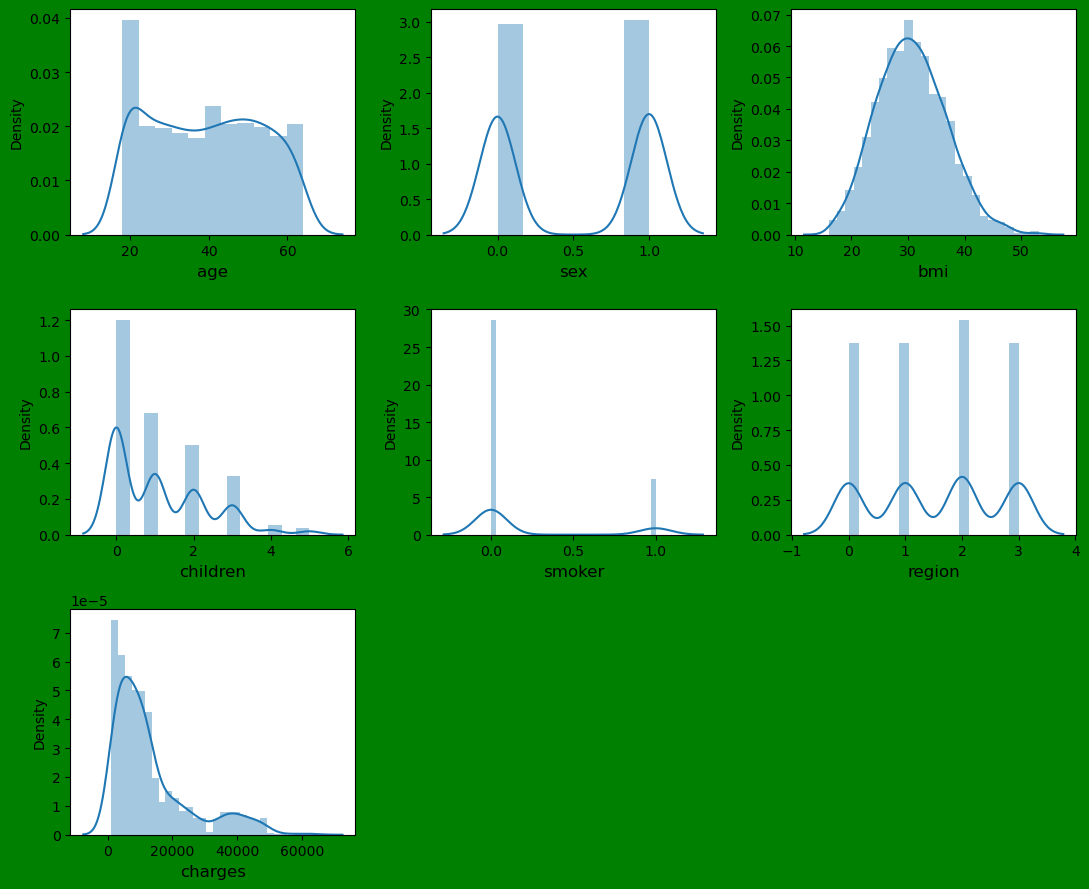

In [9]:
plt.figure(figsize=(11,9),facecolor='green')
plotnumber=1
for column in df:
    if plotnumber<=8:
        ax=plt.subplot(3,3,plotnumber)   ## Plots the graphs 3 rows and 3 columns at specified axis
        sns.distplot(df[column])    ## Plots a distribution plot of the data 
        plt.xlabel(column,fontsize=12)  
    plotnumber +=1     ## Increments or adds the graphs one by one
plt.tight_layout()

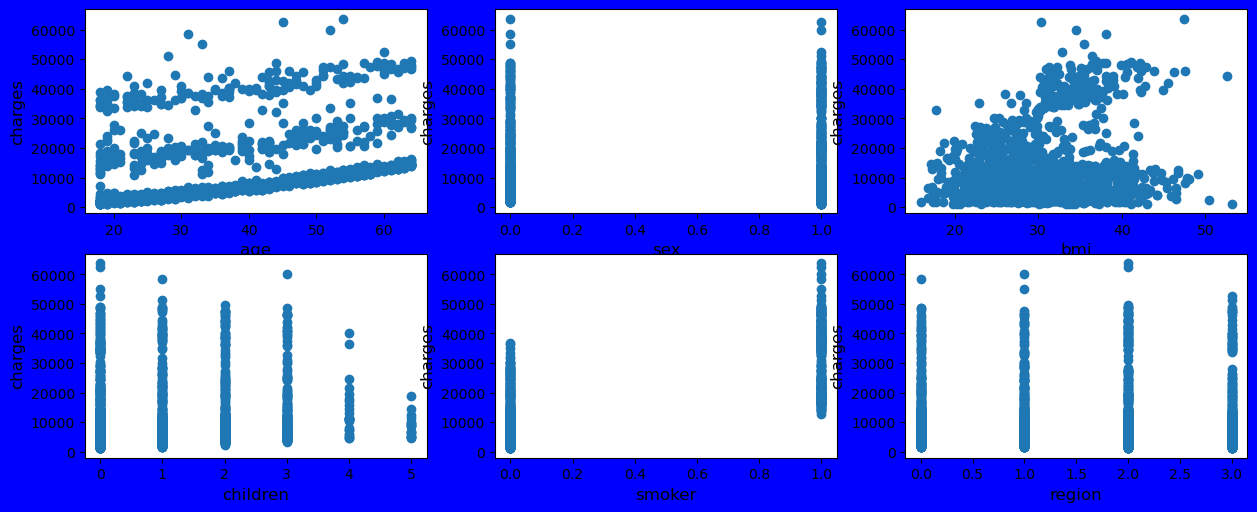

In [10]:
y=df['charges']             ## Assigning y as labels
x=df.drop(columns=['charges'])   ## Assigning x as features 

plt.figure(figsize=(15,9),facecolor='blue')
plotnumber=1
for column in x:
    if plotnumber <=6:
        ax=plt.subplot(3,3,plotnumber)   ## Specifies the axis to the columns
        plt.scatter(x[column],y)         ## Plots the scatter plot
        plt.xlabel(column , fontsize=12)
        plt.ylabel('charges',fontsize=12)
    plotnumber +=1
plt.show()

In [11]:
scaler = StandardScaler()

In [12]:
x_scaler=scaler.fit_transform(x)

In [13]:
x_scaler

array([[-1.43876426, -1.0105187 , -0.45332   , -0.90861367,  1.97058663,
         1.34390459],
       [-1.50996545,  0.98959079,  0.5096211 , -0.07876719, -0.5074631 ,
         0.43849455],
       [-0.79795355,  0.98959079,  0.38330685,  1.58092576, -0.5074631 ,
         0.43849455],
       ...,
       [-1.50996545, -1.0105187 ,  1.0148781 , -0.90861367, -0.5074631 ,
         0.43849455],
       [-1.29636188, -1.0105187 , -0.79781341, -0.90861367, -0.5074631 ,
         1.34390459],
       [ 1.55168573, -1.0105187 , -0.26138796, -0.90861367,  1.97058663,
        -0.46691549]])

In [14]:
x_scaler.shape

(1338, 6)

In [15]:
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(x_scaler,i) for i in range (x_scaler.shape[1])]

vif['Features']=x.columns

In [16]:
vif

,vif,Features
0,1.015394,age
1,1.008889,sex
2,1.040608,bmi
3,1.002482,children
4,1.006466,smoker
5,1.025966,region


In [17]:
x_train,x_test,y_train,y_test =train_test_split(x_scaler,y,test_size=0.2,random_state=0)

In [18]:
x_scaler.shape

(1338, 6)

In [19]:
x_train.shape

(1070, 6)

In [20]:
lm=LinearRegression()

In [21]:
lm.fit(x_train,y_train)

LinearRegression()

In [22]:
df.tail(2)

,age,sex,bmi,children,smoker,region,charges
1336,21,0.0,25.80,0,0.0,3.0,2007.9450
1337,61,0.0,29.07,0,1.0,1.0,29141.3603


In [23]:
print("Charges : ",lm.predict(scaler.transform([[21,0,25.80,0,0.0,3]])))

Charges :  [1279.10679357]


In [24]:
print("Charges : ",lm.predict(scaler.transform([[61,0,29.07,0,1,1]])))

Charges :  [36658.55407773]


In [25]:
lm.score(x_train,y_train)

0.7368306228430945

In [26]:
lm.score(x_test,y_test)

0.7998747145449959

In [27]:
x_graph=lm.predict(x_test)

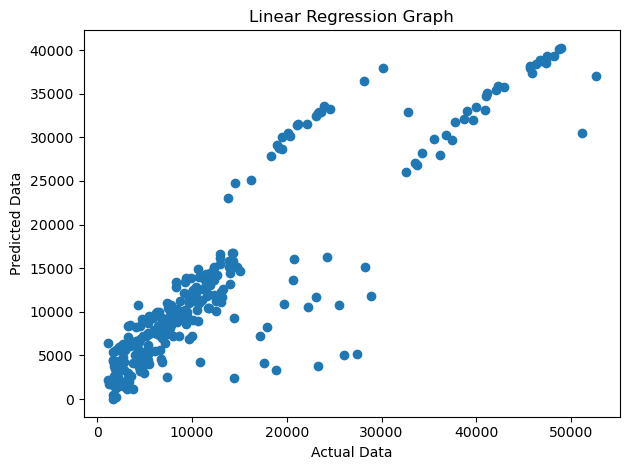

In [28]:
plt.scatter(y_test,x_graph)
plt.xlabel('Actual Data')
plt.ylabel('Predicted Data')
plt.title('Linear Regression Graph')
plt.tight_layout()

In [29]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [30]:
mean_absolute_error(y_test,x_graph)

3930.3332739011403

In [31]:
mean_squared_error(y_test,x_graph)

31845929.13415943

In [32]:
np.sqrt(mean_squared_error(y_test,x_graph))

5643.219748880902

In [33]:
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV

In [34]:
lasscv=LassoCV(alphas = None , max_iter =100)
lasscv.fit(x_train,y_train)

LassoCV(max_iter=100)

In [35]:
alpha=lasscv.alpha_
alpha

32.67567894719376

In [36]:
lasso_reg=Lasso(alpha)
lasso_reg.fit(x_train,y_train)

Lasso(alpha=32.67567894719376)

In [37]:
lasso_reg.score(x_test,y_test)

0.799231421314903

In [38]:
ridgecv=RidgeCV(alphas =np.arange(0.001,0.1,0.01))
ridgecv.fit(x_train,y_train)

RidgeCV(alphas=array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091]))

In [39]:
ridgecv.alpha_

0.09099999999999998

In [40]:
ridge_model = Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(x_train,y_train)

Ridge(alpha=0.09099999999999998)

In [41]:
ridge_model.score(x_test,y_test)

0.7998682619393176

## We have successfully build Linear Regression Model

## Now let us build  Decision Tree and Random Forest Regressor Model

## As our aim is to predict charges i.e a continuos/numerical values. Hence we need to use regression models
## We cannot use classification models as the outcome is not a categorical data

In [43]:
x_train,x_test,y_train,y_test=train_test_split(x_scaler,y,test_size=0.2,random_state=42)

In [44]:
from sklearn.tree import DecisionTreeRegressor

DecisionTreeRegressor(max_depth=10)
DecisionTreeRegressor(min_samples_split=5)
DecisionTreeRegressor(min_samples_leaf=4)
DecisionTreeRegressor(max_features='sqrt')
DecisionTreeRegressor(criterion='mse')


model = DecisionTreeRegressor()
model.fit(x_train, y_train) 

DecisionTreeRegressor()

In [45]:
model.score(x_train,y_train)

0.9983078124756305

In [46]:
model.score(x_test, y_test)

0.7393005774356084

In [47]:
x_graph=model.predict(x_test)

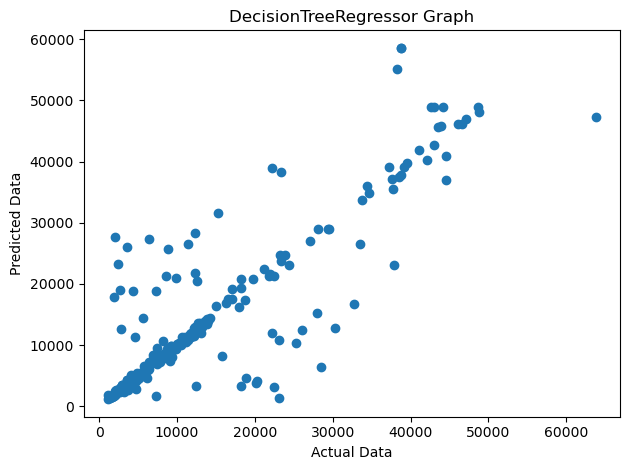

In [48]:
plt.scatter(y_test,x_graph)
plt.xlabel('Actual Data')
plt.ylabel('Predicted Data')
plt.title('DecisionTreeRegressor Graph')
plt.tight_layout()

In [49]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [50]:
mean_absolute_error(y_test,x_graph)

2914.847926936567

In [51]:
mean_squared_error(y_test,x_graph)

40473254.65375963

In [52]:
np.sqrt(mean_squared_error(y_test,x_graph))

6361.859370794015

In [53]:
from sklearn.ensemble import RandomForestRegressor
import pickle
model2 = RandomForestRegressor()
model2.fit(x_train, y_train) 

RandomForestRegressor()

In [54]:
model2.score(x_train,y_train)

0.9749780351000823

In [55]:
model2.score(x_test,y_test)

0.8665989533821202

In [56]:
x_graph=model2.predict(x_test)

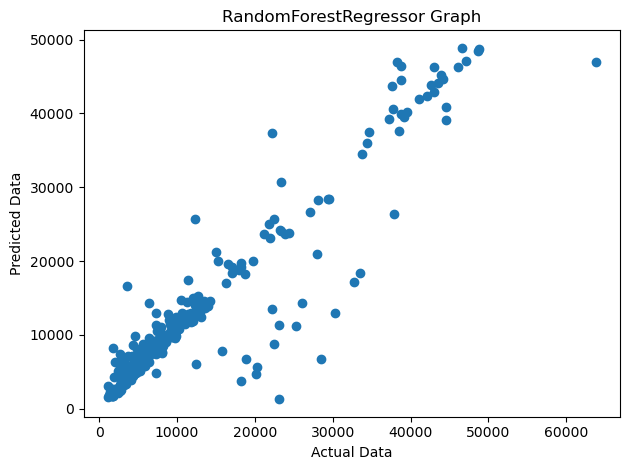

In [57]:
plt.scatter(y_test,x_graph)
plt.xlabel('Actual Data')
plt.ylabel('Predicted Data')
plt.title('RandomForestRegressor Graph')
plt.tight_layout()

In [58]:
mean_absolute_error(y_test,x_graph)

2429.707250700965

In [59]:
mean_squared_error(y_test,x_graph)

20710343.26710077

In [60]:
np.sqrt(mean_squared_error(y_test,x_graph))

4550.861815865295

## Hyperparameter Tuning

In [63]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Define the parameter grid for Decision Tree
param_grid_model = {
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Grid search for Decision Tree
grid_search_model = GridSearchCV(DecisionTreeRegressor(), param_grid_model, cv=5)
grid_search_model.fit(x_train, y_train)

print(grid_search_model.best_params_)

# Define the parameter grid for Random Forest
param_grid_model2 = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 10],
    'min_samples_leaf': [1, 5],
    'max_features': ['auto', 'sqrt'],
    'bootstrap': [True, False]
}

# Grid search for Random Forest
grid_search_model2 = GridSearchCV(RandomForestRegressor(), param_grid_model2, cv=5)
grid_search_model2.fit(x_train, y_train)

print(grid_search_model2.best_params_)


{'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 10, 'min_samples_split': 10}
{'bootstrap': False, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 300}


In [64]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import randint

# Randomized search for Decision Tree
param_dist_model = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
    'max_features': ['auto', 'sqrt', 'log2']
}

randomized_search_model = RandomizedSearchCV(DecisionTreeRegressor(), param_dist_model, n_iter=100, cv=5)
randomized_search_model.fit(x_train, y_train)

print(randomized_search_model.best_params_)

# Randomized search for Random Forest
param_dist_model2 = {
    'n_estimators': randint(100, 1000),
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
    'max_features': ['auto', 'sqrt'],
    'bootstrap': [True, False]
}

randomized_search_model2 = RandomizedSearchCV(RandomForestRegressor(), param_dist_model2, n_iter=100, cv=5)
randomized_search_model2.fit(x_train, y_train)

print(randomized_search_model2.best_params_)


{'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 19, 'min_samples_split': 2}
{'bootstrap': True, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 790}


## Now we need to load the model that using pickle

In [65]:
with open('random_forest_regressor.pkl', 'wb') as file:
    pickle.dump(model, file)

print("Model saved successfully.")

Model saved successfully.
